En este codigo se pretende realizar una red neuronal que pueda clasificar digitos escritos a mano. Para ello se usa la arquitectura de $\bf{LeNet-5}$.

En este código se estudia como el ruido puede afectar el entrenamiento de la red.

In [2]:
#importar librerias 

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Convolution2D as conv2D
from keras.layers import AveragePooling2D, MaxPooling2D 

%matplotlib inline

Using MXNet backend


In [3]:
#diseno de la red

model = Sequential()
#Layer 1
model.add(conv2D(filters = 6, 
                 kernel_size=(5,5),
                 data_format ='channels_first',
                 activation ='relu', 
                 input_shape=(1,28,28)))

#Layer 2
"""
model.add(AveragePooling2D(pool_size=(14,14),
                           data_format='channels_first'))
"""                    
model.add(MaxPooling2D(pool_size=(2,2), 
                       data_format='channels_first'))


#Layer 3
model.add(conv2D(filters = 16,
                kernel_size = (5,5),
                data_format = 'channels_first',
                activation = 'relu',
                input_shape = (1,14,14)))

#Layer 4
model.add(MaxPooling2D(pool_size=(2,2), 
                       data_format='channels_first'))




In [4]:
model.add(Dropout(0.25))
model.add(Flatten(data_format = 'channels_first'))

In [5]:
#Layer 5
"""
model.add(conv2D(filters = 120,
                kernel_size = (1,1),
                data_format = 'channels_first',
                activation = 'relu'))
"""
model.add(Dense(units = 120,
                activation = 'relu'))

#Layer 6
model.add(Dense(units = 84,
               activation = 'relu'))

#Layer 7
model.add(Dense(units = 10,
               activation = 'softmax'))

In [6]:
from keras.datasets import mnist

In [7]:
# los datos para el entrenamiento y el test

(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [8]:
from keras import backend as K

# re-dimensionar mnist

#dimension imagenes de entrada
img_filas, img_columnas = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_filas, img_columnas)
    x_test = x_test.reshape(x_test.shape[0], 1, img_filas, img_columnas)
    input_shape = (1, img_filas, img_columnas)
else:
    x_train = x_train.reshape(x_train.shape[0], img_filas, img_columnas, 1)
    x_test = x_test.reshape(x_test.shape[0], img_filas, img_columnas, 1)
    input_shape = (img_filas, img_columnas, 1)

In [9]:
from keras.utils.np_utils import to_categorical

#Convierte el y_train y y_test en numeros binarios para la comparacion

y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [10]:
#Introducir ruido

noise_factor = 0.8
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
y_train_noisy = y_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=y_train.shape) 
y_test_noisy = y_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=y_test.shape) 



x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
y_train_noisy = np.clip(y_train_noisy, 0., 1.)
y_test_noisy = np.clip(y_test_noisy, 0., 1.)



In [11]:
#np.random.normal(size = x_train_noisy.shape)

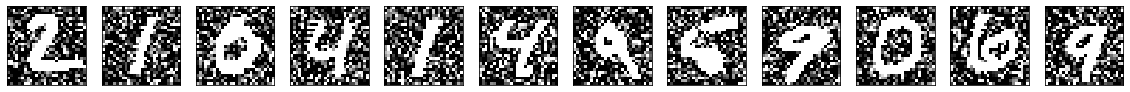

In [12]:
#visualizacion de los digitos

n = 12
plt.figure(figsize=(20, 2))
for i in range(1,n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
#plt.show()

In [13]:
# Ruido agregado a los data test y data train
"""
k=1.4
x_test_noisy = x_test + k*np.random.random( size = x_test.shape)
x_train_noisy = x_train + k*np.random.random( size = x_train.shape)
y_test_noisy = y_test + k*np.random.random( size = y_test.shape)
y_train_noisy = y_train + k*np.random.random( size = y_train.shape)
"""


'\nk=1.4\nx_test_noisy = x_test + k*np.random.random( size = x_test.shape)\nx_train_noisy = x_train + k*np.random.random( size = x_train.shape)\ny_test_noisy = y_test + k*np.random.random( size = y_test.shape)\ny_train_noisy = y_train + k*np.random.random( size = y_train.shape)\n'

In [14]:
#compilar red neuronal 
from keras.losses import categorical_crossentropy

model.compile(optimizer= 'Adam',loss = 'poisson', metrics=['accuracy','mae'])

In [15]:
# entrenamiento

import time 
time_star  = time.time()


#con ruido
model.fit(x_train_noisy,
          y_train_noisy,
          batch_size = 1000,
          epochs = 10,
          shuffle= True)


time_end = time.time()
time = (time_end-time_star)

print('time training %f [s]'%time)
#print(time)

Epoch 1/10
 1000/60000 [..............................] - ETA: 1:30 - loss: 0.8692 - acc: 0.1280 - mean_absolute_error: 0.3233

/usr/local/lib/python3.5/dist-packages/mxnet/module/bucketing_module.py:408: UserWarning: Optimizer created manually outside Module but rescale_grad is not normalized to 1.0/batch_size/num_workers (1.0 vs. 0.001). Is this intended?
  force_init=force_init)


60000/60000 [==============================] - 2s 39us/step - loss: 0.8439 - acc: 0.1776 - mean_absolute_error: 0.3198
Epoch 2/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.8359 - acc: 0.2982 - mean_absolute_error: 0.3165
Epoch 3/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.8329 - acc: 0.3203 - mean_absolute_error: 0.3150
Epoch 4/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.8312 - acc: 0.3304 - mean_absolute_error: 0.3141
Epoch 5/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.8302 - acc: 0.3357 - mean_absolute_error: 0.3136
Epoch 6/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.8296 - acc: 0.3403 - mean_absolute_error: 0.3133
Epoch 7/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.8293 - acc: 0.3424 - mean_absolute_error: 0.3131
Epoch 8/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.8289 - acc: 0.3443 -

In [16]:
score = model.evaluate(x_test_noisy, y_test_noisy, verbose=0)

In [22]:
print("       loss       accuracy         mae")
print(score)

       loss       accuracy         mae
[0.825141602230072, 0.3621, 0.3117752697944641]


In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 6, 24, 24)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 12, 12)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 8, 8)          2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 4, 4)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 4, 4)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               30840     
__________

### Observaciones

Como era de suponer el $accuracy$ varia dependiendo del factor de ruido que se implemente.

Los cambios pueden variar drasticamente del valor de ruido.

Si $noise\_factor = 0.9$ entonces $\to acc: 0.22$ 

Si $noise\_factor = 0.5$ entonces $\to acc: 0.62$ 

Si $noise\_factor = 0.1$ entonces $\to acc: 0.97$ 
